#### Instalando a biblioteca yfinance

In [ ]:
#!pip install yfinance --upgrade --no-cache-dir

## 1.0 Import

In [ ]:
# Para manipulação de dados
import numpy as np
import pandas as pd

# Para buscar dados financeiros
import yfinance as yf

# Para visualização
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
%matplotlib inline

## 2.0 Chamando a base de dados

In [ ]:
# Definir o ticker como 'EURUSD=X'
forex_data = yf.download('EURUSD=X', start='2010-01-02', end='2022-11-03')

# Definir o índice para um objeto datetime
forex_data.index = pd.to_datetime(forex_data.index)

# dropar as colunas
forex_data.drop(['Volume','Adj Close' ],axis=1, inplace=True)

# Exibir as últimas cinco linhas
forex_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2010-01-04,1.431004,1.445191,1.426208,1.442398
2010-01-05,1.442710,1.448310,1.435194,1.436596
2010-01-06,1.436596,1.443460,1.429123,1.440403
2010-01-07,1.440300,1.444481,1.430206,1.431803
2010-01-08,1.432090,1.443606,1.427104,1.441109


## 3.0 plotagem

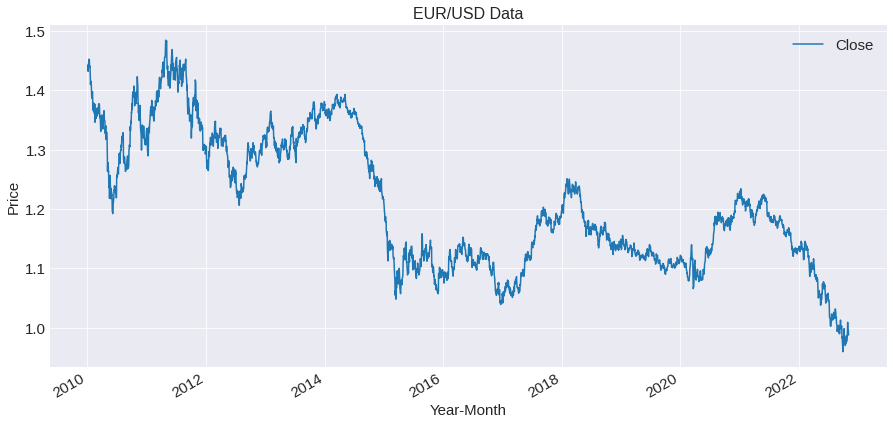

In [ ]:
# plot: o preço de fechamento
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Defina o título e o rótolo do eixo
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Mostra a plot
plt.show()

## 4.0 Dados de preço do forex por minuto

In [ ]:
#Definir o ticker como 'EURUSD=X'
forex_data_minute = yf.download('EURUSD=X', period='5d', interval='1m')

# Definir o índice para um objeto datetime
forex_data_minute.index = pd.to_datetime(forex_data_minute.index)

# Exibir as últimas cinco linhas
forex_data_minute.tail()

# dropar colunas
forex_data_minute.drop(['Volume','Adj Close' ],axis=1, inplace=False)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2022-11-15 00:00:00,1.032311,1.032311,1.032311,1.032311
2022-11-15 00:01:00,1.032738,1.032738,1.032738,1.032738
2022-11-15 00:02:00,1.032524,1.032524,1.032524,1.032524
2022-11-15 00:03:00,1.032524,1.032524,1.032524,1.032524
2022-11-15 00:04:00,1.032524,1.032524,1.032524,1.032524
...,...,...,...,...
2022-11-21 14:13:00,1.024590,1.024590,1.024590,1.024590
2022-11-21 14:14:00,1.024590,1.024590,1.024590,1.024590
2022-11-21 14:15:00,1.024695,1.024695,1.024695,1.024695


## 5.0 plot: O Preço por Minuto com a coluna de Fechamento

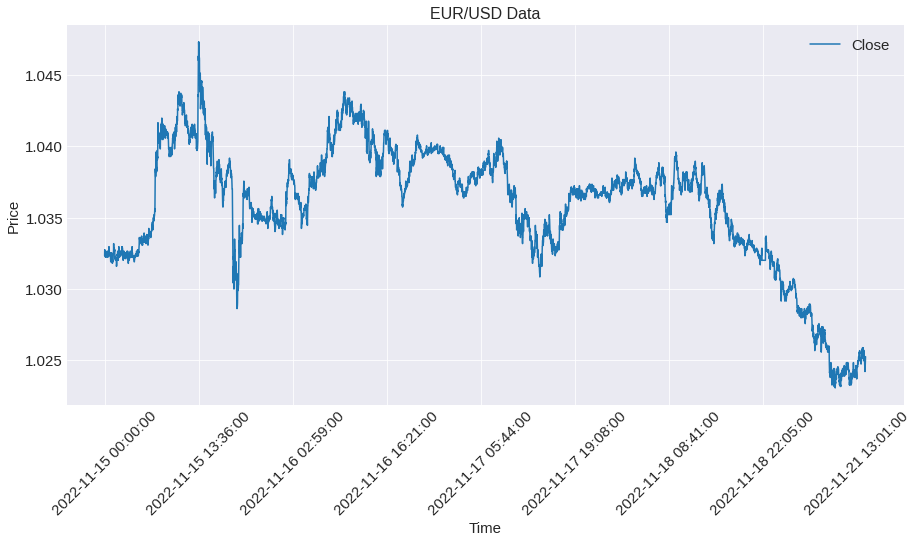

In [ ]:
# transformar o tipo de índice de datatime em string
forex_data_minute['dates'] = forex_data_minute.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot as séries
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_minute['dates'], forex_data_minute['Close'])

# Definir título e rótulo do eixo
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Defina o número máximo de localizadores de ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# mostrar o plot
plt.show()

In [ ]:
forex_data.describe()

,Open,High,Low,Close
count,3343.000000,3343.000000,3343.000000,3343.000000
mean,1.208865,1.213054,1.204395,1.208839
std,0.112680,0.113198,0.112320,0.112611
min,0.959619,0.967006,0.760572,0.959619
25%,1.119094,1.122284,1.115195,1.118988
50%,1.181419,1.184357,1.177856,1.181544
75%,1.310573,1.314985,1.305642,1.310461
max,1.484296,1.493808,1.480494,1.484406


## 6.0 Dados diários de dois pares no Forex


In [ ]:
# Definir o ticker como 'EURUSD=X'
forex_data = yf.download(['EURUSD=X', 'GBPUSD=X'],
                         start='2010-01-02', end='2022-10-30', group_by='ticker')

# Definir o índice para um objeto datetime
forex_data.index = pd.to_datetime(forex_data.index)

# Exibir as últimas cinco linhas
forex_data.tail()

# drop columns
#forex_data_minute.drop(['Volume','Adj Close' ],axis=1, inplace=False)

[*********************100%***********************]  2 of 2 completed


EURUSD=X                                                 GBPUSD=X  \
                Open      High       Low     Close Adj Close Volume      Open   
Date                                                                            
2022-10-24  0.986009  0.988963  0.980892  0.986009  0.986009    0.0  1.133645   
2022-10-25  0.988650  0.997536  0.985222  0.988650  0.988650    0.0  1.130544   
2022-10-26  0.996373  1.008054  0.994461  0.996373  0.996373    0.0  1.146066   
2022-10-27  1.009194  1.009489  0.997646  1.009194  1.009194    0.0  1.163345   
2022-10-28  0.996780  0.999900  0.993147  0.996780  0.996780    0.0  1.156738   

                                                           
                High       Low     Close Adj Close Volume  
Date                                                       
2022-10-24  1.137980  1.127485  1.134469  1.134469    0.0  
2022-10-25  1.149954  1.127370  1.130774  1.130774    0.0  
2022-10-26  1.162358  1.143419  1.146224  1.146224    0.0  
2022-10-27  1.164415  1.155095  1.163819  1.163819    0.0  
2022-10-28  1.160012  1.150616  1.156604  1.156604    0.0

### 6.1 Plot: Dois pares 

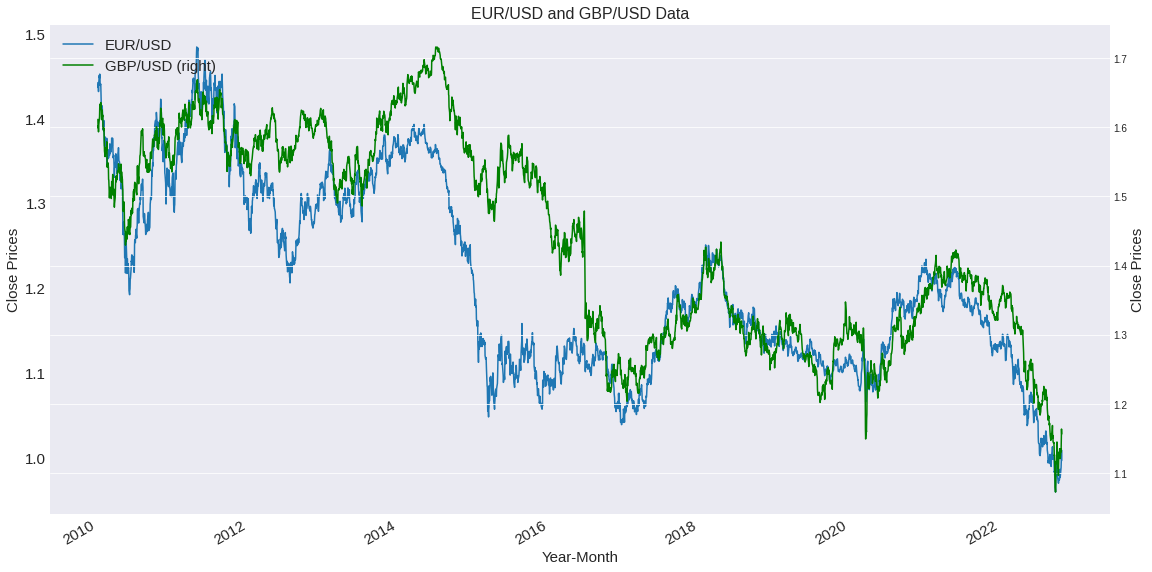

In [ ]:
# Plot tamanho
ax = plt.figure(figsize=(19,10))

# Plot ambos os pares forex
ax = forex_data['EURUSD=X']['Close'].plot(label='EUR/USD')
ax2 = forex_data['GBPUSD=X']['Close'].plot(secondary_y=True, color='g',  ax=ax, label='GBP/USD')

# Defina os rótulos do título e do eixo
plt.title('EUR/USD and GBP/USD Data', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Close Prices', fontsize=15)
ax2.set_ylabel('Close Prices', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2, prop={'size': 15})

# Salve a figura
#plt.savefig('Figures/EURUSD_and_GBPUSD_Daily_Data.png', box_inches = 'tight')
# mostrar o plot
plt.show()